In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.base import ClassifierMixin
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data\\balanced_data.csv")
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


In [3]:
X = df.drop(['Target'], axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle=True, test_size=0.2)
print(X_train.shape, y_test.shape)

(542, 6) (136,)


## Metrics score of each algorithm 

In [4]:
def metrics(algo:ClassifierMixin)->None:
    # train and test score
    model = algo.fit(X_train, y_train)
    print('Training score -------->', model.score(X_train, y_train))
    print('Testing score -------->', model.score(X_test, y_test))

    # Confusion matrics
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sb.heatmap(data=cm, fmt='.2g', annot=True)
    plt.title(f'{algo}')
    plt.xlabel("True values")
    plt.ylabel("predicted values")
    plt.show()

    # classification report
    print(classification_report(y_test, y_pred))

Training score --------> 1.0
Testing score --------> 0.9852941176470589


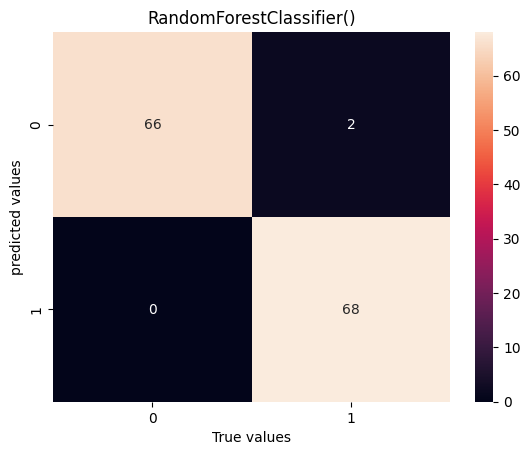

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        68

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



In [5]:
metrics(RandomForestClassifier())

Training score --------> 0.996309963099631
Testing score --------> 0.9779411764705882


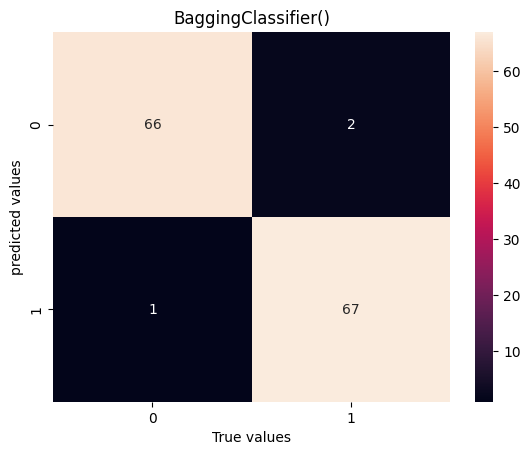

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.97      0.99      0.98        68

    accuracy                           0.98       136
   macro avg       0.98      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



In [6]:
metrics(BaggingClassifier())

Training score --------> 0.7915129151291513
Testing score --------> 0.8235294117647058


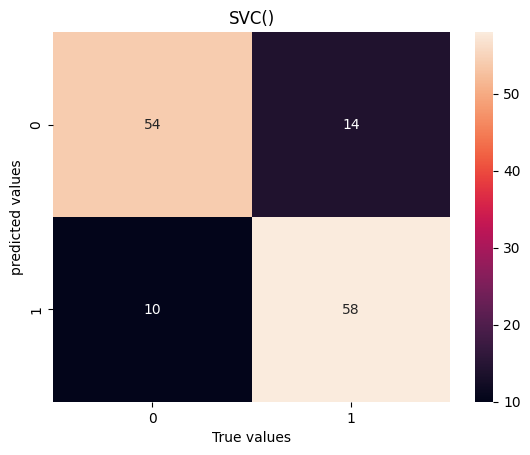

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        68
           1       0.81      0.85      0.83        68

    accuracy                           0.82       136
   macro avg       0.82      0.82      0.82       136
weighted avg       0.82      0.82      0.82       136



In [7]:
metrics(SVC())

Training score --------> 0.8819188191881919
Testing score --------> 0.8676470588235294


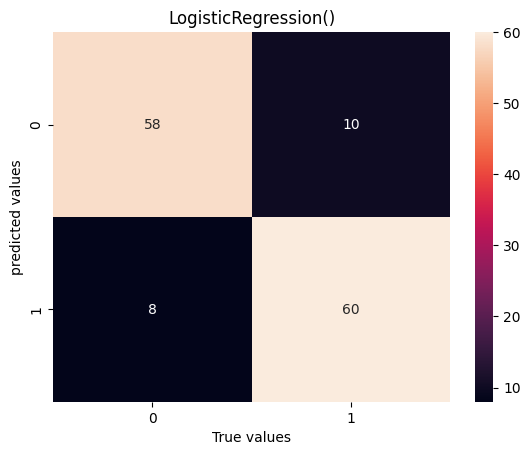

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        68
           1       0.86      0.88      0.87        68

    accuracy                           0.87       136
   macro avg       0.87      0.87      0.87       136
weighted avg       0.87      0.87      0.87       136



In [8]:
metrics(LogisticRegression())

Training score --------> 0.8892988929889298
Testing score --------> 0.8308823529411765


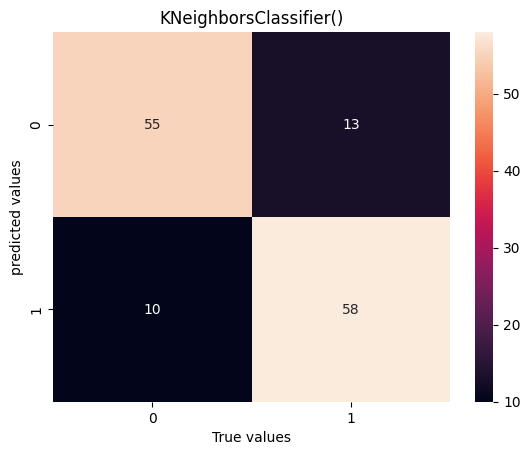

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        68
           1       0.82      0.85      0.83        68

    accuracy                           0.83       136
   macro avg       0.83      0.83      0.83       136
weighted avg       0.83      0.83      0.83       136



In [9]:
metrics(KNeighborsClassifier())

Training score --------> 1.0
Testing score --------> 0.9779411764705882


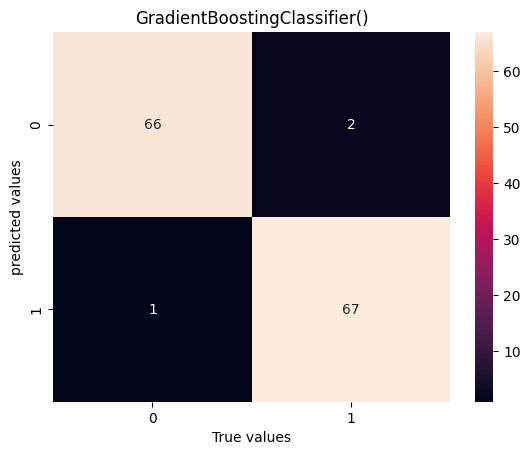

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.97      0.99      0.98        68

    accuracy                           0.98       136
   macro avg       0.98      0.98      0.98       136
weighted avg       0.98      0.98      0.98       136



In [10]:
metrics(GradientBoostingClassifier())

## Model saving

In [11]:
model = RandomForestClassifier()
model.fit(X, y)
import joblib
joblib.dump(model, 'models\\rfc_98.pkl')
joblib.dump(X_train.columns, 'params\\columns.pkl')

['params\\columns.pkl']

In [12]:
print(X_train.columns)

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')


In [13]:
model.predict(X_train)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,